In [ ]:
!pip install inference-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.10
    Uninstalling aiohttp-3.11.10:
      Successfully uninstalled aiohttp-3.11.10


## **Inference Server API 방식**

* Docker 기반 추론서버를 통해 HTTP 요청을 통해 roboflow와 통신  
* Only Python

---

*이미지*
``` bash
$ docker pull roboflow/roboflow-inference-server-cpu
$ docker pull roboflow/roboflow-inference-server-gpu
$ docker pull roboflow/roboflow-inference-server
```


*추론서버 실행*

```
$ git clone https://github.com/roboflow/inference
$ cd inference

$ docker build \
-f docker/dockerfiles/Dockerfile.onnx.cpu \
-t roboflow/roboflow-inference-server-cpu .

# 기본 실행
$ docker run -it --net=host \
roboflow/roboflow-inference-server-cpu:latest
# Mac
$ docker run -it -p 9001:9001 roboflow/roboflow-inference-server-cpu

# Notebook기능 활성화
$ docker run -it --net=host \
-e NOTEBOOK_ENABLED=true \
-p 9002:9002 roboflow/roboflow-inference-server-cpu:latest
```



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### 1. Settings

In [ ]:
import os

base_dir = "/content/gdrive/MyDrive/Workspace/Colab"
src_dir = os.path.join(base_dir, "roboflow")

%cd $src_dir

/content/gdrive/MyDrive/Workspace/Colab/roboflow


In [ ]:
!pip install -r requirements.txt > /dev/null

In [ ]:
import getpass
import import_ipynb
from dotenv import load_dotenv

load_dotenv()

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY") or getpass.getpass("Enter your OPENAI_API_KEY: ")

if not ROBOFLOW_API_KEY:
    raise ValueError("ROBOFLOW API KEY not found in .env file.")

In [ ]:
# Private API Key
!curl "https://api.roboflow.com/?api_key={ROBOFLOW_API_KEY}"

{
    "welcome": "Welcome to the Roboflow API.",
    "instructions": "You are successfully authenticated.",
    "docs": "https://docs.roboflow.com",
    "workspace": "test-yghfc"
}

### 2. Inference Server 실행 이후

* 사전 1. 추론서버 기동

In [ ]:
from inference_sdk import InferenceHTTPClient

In [ ]:
import json
import datetime

def datetime_converter(o):
  if isinstance(o, datetime.datetime):
    return o.isoformat()

In [ ]:
project_id = "demo-e3hej"
model_version = 4

confidence = 0.3
iou_thresh = 0.5

api_key = ROBOFLOW_API_KEY
image_url = "https://drive.google.com/u/0/drive-viewer/AKGpihZBx29XpclB7mH9DWP6xIbETEsouRs_XehFECvE-OlhP68_pCMIvhonkx6sRft11a6QxFets4cg6CU-1KKvot8oJchCRaf3HE8"

* [구글 드라이브 - 이미지 호스팅](https://playwithme.tistory.com/198)
* *wsl일 경우, 포트포워딩해야함*

* 외부 접근을 위해 포트포워딩 (터널링 ngrok 적용)


``` bash
$ ngrok http 9001

'''
Session Status                online
Account                       (Plan: Free)
Update                        update available (version 3.18.4, Ctrl-U to update)
Version                       3.12.1
Region                        Japan (jp)
Latency                       38ms
Web Interface                 http://127.0.0.1:4040

Forwarding                    https://d74b-220-117-8-230.ngrok-free.app -> http://localhost:9001
'''
```



*`docker stats` 로 cpu 변화 확인*

In [ ]:
client = InferenceHTTPClient(
    api_url="https://d74b-220-117-8-230.ngrok-free.app",
    api_key=ROBOFLOW_API_KEY,
)

# {project_id}/{model_version}?api_key={api_key}&confidence={confidence}&overlap={iou_thresh}&image={image_url}"
predictions = client.infer(image_url, model_id=f"{project_id}/{model_version}")
print(predictions)

{'inference_id': '7ad89b3d-3f59-49b1-8152-9a61354f8078', 'time': 0.0669994019999649, 'image': {'width': 578, 'height': 367}, 'predictions': [{'x': 301.5, 'y': 179.0, 'width': 81.0, 'height': 98.0, 'confidence': 0.9417306184768677, 'class': 'helmet', 'class_id': 1, 'detection_id': '9a23d4a3-9f0b-468b-933d-2dbff5ac1f9e'}]}


* AsyncIO
* Parallel / Batch
* *`http://ip:port/docs` API참고*

---

* [사용법](https://inference.roboflow.com/quickstart/run_model_on_image/#run-inference-on-a-v2-route)
* [inference_sdk doc](https://inference.roboflow.com/inference_helpers/inference_sdk/)

In [ ]:
print(json.dumps(predictions, default=datetime_converter, indent=4))

{
    "inference_id": "aa65b90b-e796-4fa6-91ff-5729f85964da",
    "time": 0.08231430099976933,
    "image": {
        "width": 578,
        "height": 367
    },
    "predictions": [
        {
            "x": 301.5,
            "y": 179.0,
            "width": 81.0,
            "height": 98.0,
            "confidence": 0.9417306184768677,
            "class": "helmet",
            "class_id": 1,
            "detection_id": "034061be-e6b5-44a1-8258-aecf792732df"
        }
    ]
}


### 3. Clip



``` python
# batch image request
client.get_clip_image_embeddings(inference_input=["./my_image.jpg", "./other_image.jpg"])
client.get_clip_text_embeddings(text=["some", "other"])
```



In [ ]:
!ls

 4.png	  ex1_roboflow_python_sdk.ipynb   'ex3_roboflow_ inference_server_api_아직확인X.ipynb'
 demo-3  'ex2_roboflow_ cloud_api.ipynb'   requirements.txt


In [ ]:
img_path = "./4.png"

client.get_clip_image_embeddings(inference_input=img_path)
client.get_clip_text_embeddings(text="helmet")

client.clip_compare(
    subject=img_path,
    prompt=["helmet"],
)

{'inference_id': None,
 'frame_id': None,
 'time': 0.21133959100006905,
 'similarity': [0.1592276245355606],
 'parent_id': None}

### 4. Plot

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

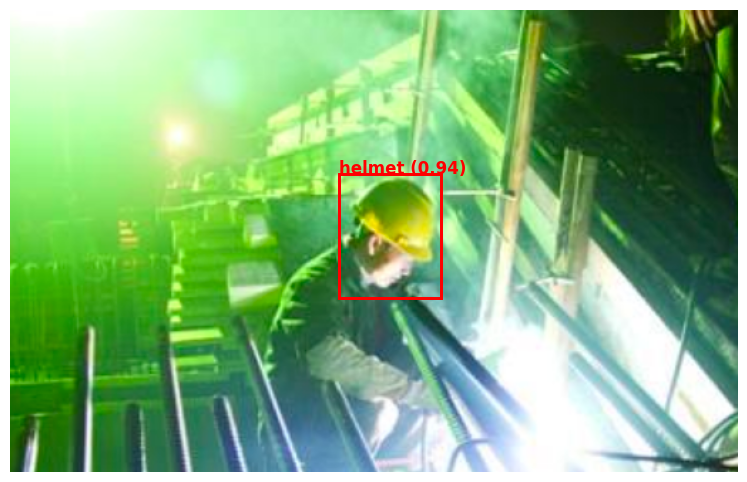

In [ ]:
image_width = predictions["image"]["width"]
image_height = predictions["image"]["height"]
predictions_list = predictions["predictions"]

img = Image.open(img_path)

plt.figure(figsize=(10, 6))
plt.imshow(img)


for prediction in predictions_list:
    cx = prediction["x"]
    cy = prediction["y"]
    width = prediction["width"]
    height = prediction["height"]
    confidence = prediction["confidence"]
    class_name = prediction["class"]

    x = cx - (width / 2)
    y = cy - (height / 2)

    # BBox
    rect = plt.Rectangle(
        (x, y), width, height, linewidth=2, edgecolor='r', facecolor='none'
    )
    plt.gca().add_patch(rect)
    plt.gca().add_patch(rect)

    plt.text(
        x, y, f"{class_name} ({confidence:.2f})", color='r', fontsize=12, weight='bold'
    )

plt.axis('off')
plt.show()